In [ ]:
#import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#import dữ liệu
data=pd.read_csv('/content/corporate_rating.csv')
data

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,30.602414,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,Finance,0.883875,0.842553,0.233830,147.599371,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,131.644566,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


#EDA

Bước đầu tiên là thực hiện EDA để hiểu các đặc điểm của tập dữ liệu.

In [ ]:
print('Dữ liệu có',data.shape[0], 'dòng và', data.shape[1], 'cột')

Dữ liệu có 2029 dòng và 31 cột


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

- Dữ liệu có 6 thuộc tính mô tả đối tượng và 25 thuộc tính về chỉ số tài chính

- Không có giá trị nào bị thiếu

In [ ]:
#Kiểm tra các instance bị trùng lặp
data[data.duplicated()]

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover


- Không có dữ liệu trùng

In [ ]:
#Đếm các giá trị unique trong cột Name
print('Trong tập dữ liệu có',data['Name'].nunique(),'công ty được xếp hạng')

Trong tập dữ liệu có 593 công ty được xếp hạng


In [ ]:
#Đếm các giá trị unique trong cột Rating Agency Name
print('Trong tập dữ liệu có',data['Rating Agency Name'].nunique(),'tổ chức xếp hạng tín dụng')
data['Rating Agency Name'].unique()

Trong tập dữ liệu có 5 tổ chức xếp hạng tín dụng


array(['Egan-Jones Ratings Company', 'Fitch Ratings',
       "Standard & Poor's Ratings Services", "Moody's Investors Service",
       'DBRS'], dtype=object)

In [ ]:
#Đếm các giá trị unique trong cột Rating
data['Rating'].value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

Trong tập dữ liệu này có năm cơ quan tham gia xếp hạng tín dụng. Trong đó, Standard & Poor's (S&P), Moody's và Fitch là 3 cơ quan chính xếp hạng tín dụng doanh nghiệp. Mỗi cơ quan có hệ thống đánh giá riêng không nhất thiết phải tương ứng với thang đánh giá của các cơ quan khác, nhưng chúng đều tương tự nhau. 

- Ví dụ: Standard & Poor”s sử dụng "AAA" cho chất lượng tín dụng cao nhất với rủi ro tín dụng thấp nhất, "AA" cho chất lượng tín dụng tốt nhất tiếp theo, tiếp theo là "A", sau đó là "BBB" cho tín dụng có rủi ro trung bình. Mọi xếp hạng khác dưới "BBB" được coi là đầu cơ hoặc tệ hơn là xếp hạng "D", cho rủi ro vỡ nợ hoặc " tín dụng rác ".

Vậy nên, để tạo sự đồng nhất cho rating, cũng như giảm bớt số lớp trong quá trình phân lớp, thuận tiện cho mục tiêu bài làm, chúng ta sẽ thay thế các nhãn xếp hạng (BBB, BB, A, B, AA, CCC, AAA, CC, C, D) bằng cột Rating_name là ý nghĩa của các Rating. Theo trang web Investopedia:

|Moody's|Standard & Poor's|Fitch|Grade|Risk|
|---|---|---|---|---|
Aaa|AAA|AAA|Investment|Lowest Risk
Aa|AA|AA|Investment|Low Risk
A|A|A|Investment|Low Risk
Baa|BBB|BBB|Investment|Medium Risk
Ba, B|BB, B|BB, B|Junk|High Risk
Caa/Ca|CCC/CC/C|CCC/CC/C|Junk|Highest Risk
C|D|D|Junk|In Default


In [ ]:
#Thêm cột Rating_name
rating_dict = {'AAA':'Lowest Risk', 
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk', 
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk', 
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'In Default'}
data['Rating_name'] = data['Rating'].map(rating_dict)

High Risk       792
Medium Risk     671
Low Risk        487
Highest Risk     71
Lowest Risk       7
In Default        1
Name: Rating_name, dtype: int64


[Text(0.5, 0, 'Label')]

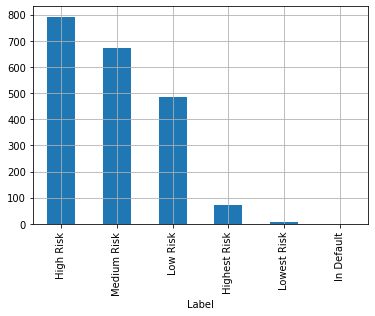

In [ ]:
#Biểu đồ số instance mỗi label
print(data['Rating_name'].value_counts())

plt_label=data['Rating_name'].value_counts().plot(kind='bar',grid=True)
plt_label.set(xlabel='Label')

- Dữ liệu bị bias

- Chỉ có 1 instance có label "In Default". Không thể chia tập dữ liệu train hay test để xây dựng model. Nên sẽ xóa instance này.

In [ ]:
data = data[data['Rating_name']!='In Default']
data.reset_index(inplace = True, drop=True)

###Thống kê mô tả dữ liệu

In [ ]:
data.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,...,2028.000000,2028.000000,2.028000e+03,2.028000e+03,2028.000000,2028.000000,2028.000000,2.028000e+03,2028.000000,2028.000000
mean,3.531059,2.655103,0.667685,333.933208,0.278496,0.431632,0.497720,0.587709,-37.536449,-74.010687,...,0.397960,0.409543,5.097230e+03,4.229633e+03,3.330842,0.437605,48.301531,6.518334e+03,1.448326,38.019656
std,44.063178,32.952904,3.584798,4448.932277,6.065629,8.987196,0.525318,11.227377,1166.459546,2350.854814,...,10.597674,3.797425,1.469518e+05,1.224301e+05,87.550842,8.986512,529.249110,1.775727e+05,19.488075,759.110385
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.073057,0.602871,0.131114,22.887314,0.020981,0.025613,0.233098,0.044684,0.019100,0.028093,...,0.147591,0.271252,4.119190e-01,1.571515e+00,2.047863,0.028021,6.237490,2.354986e+00,0.073830,2.205032
50%,1.493620,0.986060,0.297573,42.373806,0.064722,0.084939,0.414671,0.108014,0.045632,0.074519,...,0.300712,0.644685,2.135394e+00,3.687036e+00,2.654292,0.087284,9.272444,4.353118e+00,0.133079,5.761235
75%,2.167483,1.453839,0.625018,59.330103,0.114805,0.144840,0.847261,0.176200,0.077473,0.135039,...,0.370658,0.837079,4.234067e+00,8.091732e+00,3.658855,0.149435,12.911302,7.320457e+00,0.240930,9.485535
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


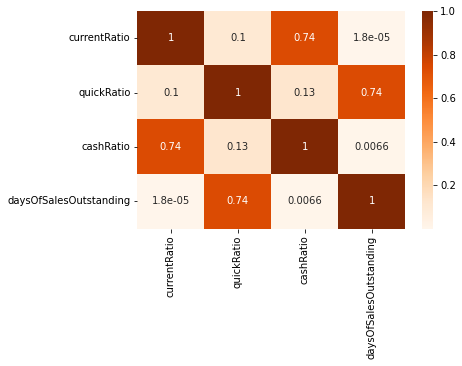

In [ ]:
#Biểu đồ tương quan giữa các feature đo lường khả năng thanh toán
kntt=data[['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding']]
sns.heatmap(kntt.corr(), cmap='Oranges',annot=True)

- Các feature trong nhóm có tương quan với nhau, nhưng mức độ tương quan không cao, chấp nhận được, nên không cần loại feature nào.

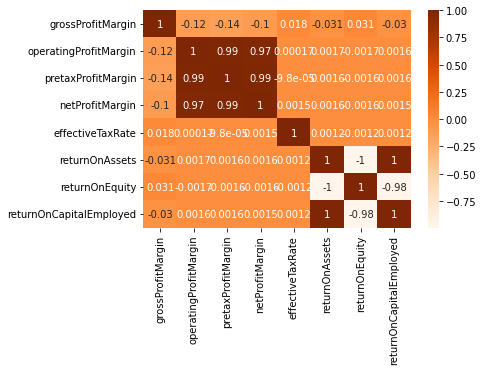

In [ ]:
#Biểu đồ tương quan giữa các feature đo lường khả năng sinh lợi
knsl=data[['grossProfitMargin', 'operatingProfitMargin', 'pretaxProfitMargin', 'netProfitMargin', 'effectiveTaxRate', 'returnOnAssets', 'returnOnEquity', 'returnOnCapitalEmployed' ]]
sns.heatmap(knsl.corr(), cmap='Oranges',annot=True)

- operatingProfitMargin tương quan mạnh (0.99) với pretaxProfitMargin => Xóa bớt cột operatingProfitMargin

- pretaxProfitMargin tương quan mạnh (0.99) với netProfitMargin => Xóa bớt cột pretaxProfitMargin

- returnOnAssets tương quan mạnh (1) với returnOnCapitalEmployed => Xóa bớt cột returnOnAssets

In [ ]:
#Xóa cột operatingProfitMargin, pretaxProfitMargin, returnOnAssets
data=data.drop (['operatingProfitMargin','pretaxProfitMargin','returnOnAssets'],axis=1)

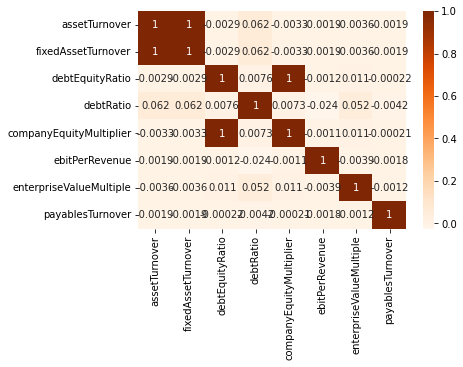

In [ ]:
#Biểu đồ tương quan giữa các feature đo lường hiệu suất hoạt động
hshd=data[['assetTurnover','fixedAssetTurnover', 'debtEquityRatio', 'debtRatio', 'companyEquityMultiplier', 'ebitPerRevenue', 'enterpriseValueMultiple', 'payablesTurnover']]
sns.heatmap(hshd.corr(), cmap='Oranges',annot=True)

- assetTurnover tương quan mạnh (1) với fixedAssetTurnover => Xóa cột assetTurnover

- debtEquityRatio tương quan mạnh (1) với companyEquityMultiplier => Xóa cột debtEquityRatio

In [ ]:
# Xóa cột assetTurnover, debtEquityRatio
data=data.drop(['assetTurnover','debtEquityRatio'], axis=1)

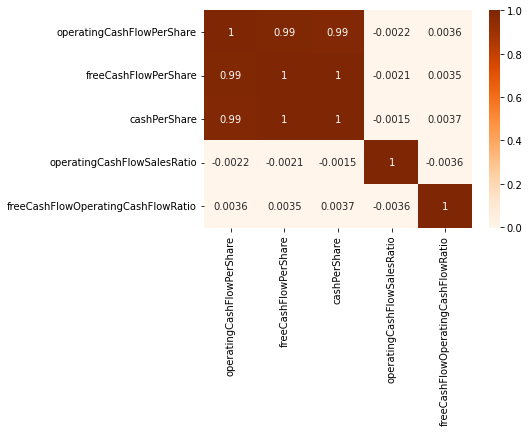

In [ ]:
#Biểu đồ tương quan giữa các feature đo lường tỷ lệ chỉ báo dòng tiền
dt=data[['operatingCashFlowPerShare', 'freeCashFlowPerShare', 'cashPerShare', 'operatingCashFlowSalesRatio', 'freeCashFlowOperatingCashFlowRatio']]
sns.heatmap(dt.corr(), cmap='Oranges',annot=True)

- operatingCashFlowPerShare tương quan mạnh (0.99) với freeCashFlowPerShare => Xóa cột operatingCashFlowPerShare
- freeCashFlowPerShare tương quan mạnh (1) với cashPerShare => Xóa cột freeCashFlowPerShare

In [ ]:
#Xóa cột operatingCashFlowPerShare, freeCashFlowPerShare
data=data.drop (['operatingCashFlowPerShare','freeCashFlowPerShare'], axis=1)

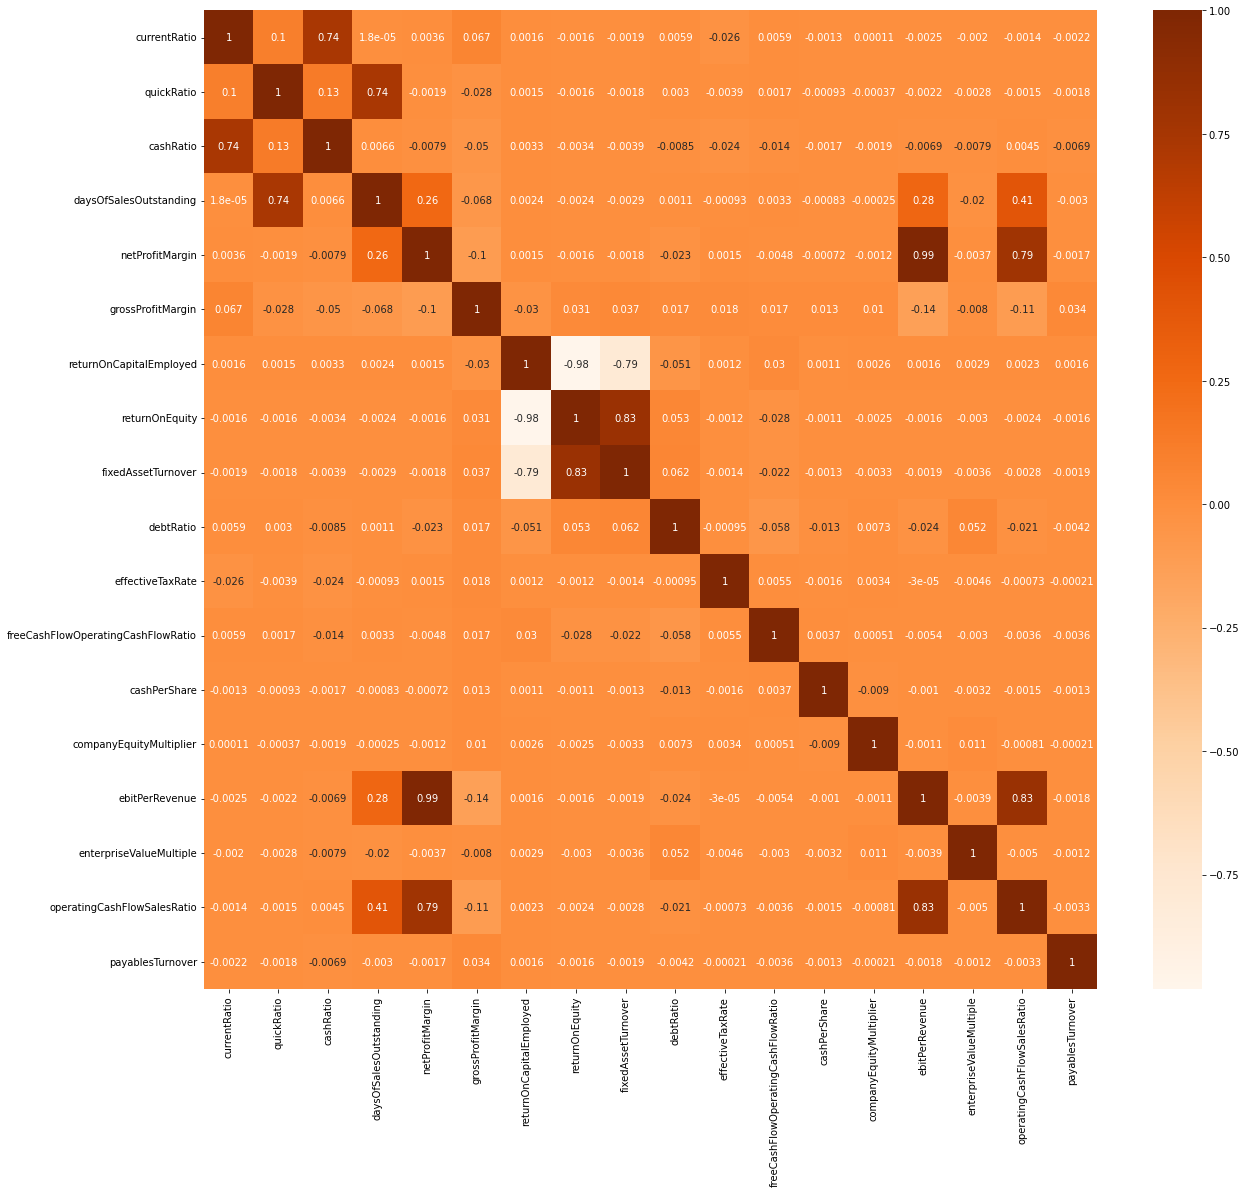

In [ ]:
#Biểu đồ tương quan giữa các feature
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), cmap='Oranges',annot=True)

- ebitPerRevenue tương quan mạnh (0.99) với netProfitMargin => Xóa cột ebitPerRevenue

In [ ]:
#Xóa cột ebitPerRevenue
data=data.drop (['ebitPerRevenue'], axis=1)

- Sau khi vẽ biểu đồ tương quan, nhận thấy các feature có tương quan mạnh với nhau (tương tự nhau), tiến hành loại tất cả 8 features, giữ lại 17 features.

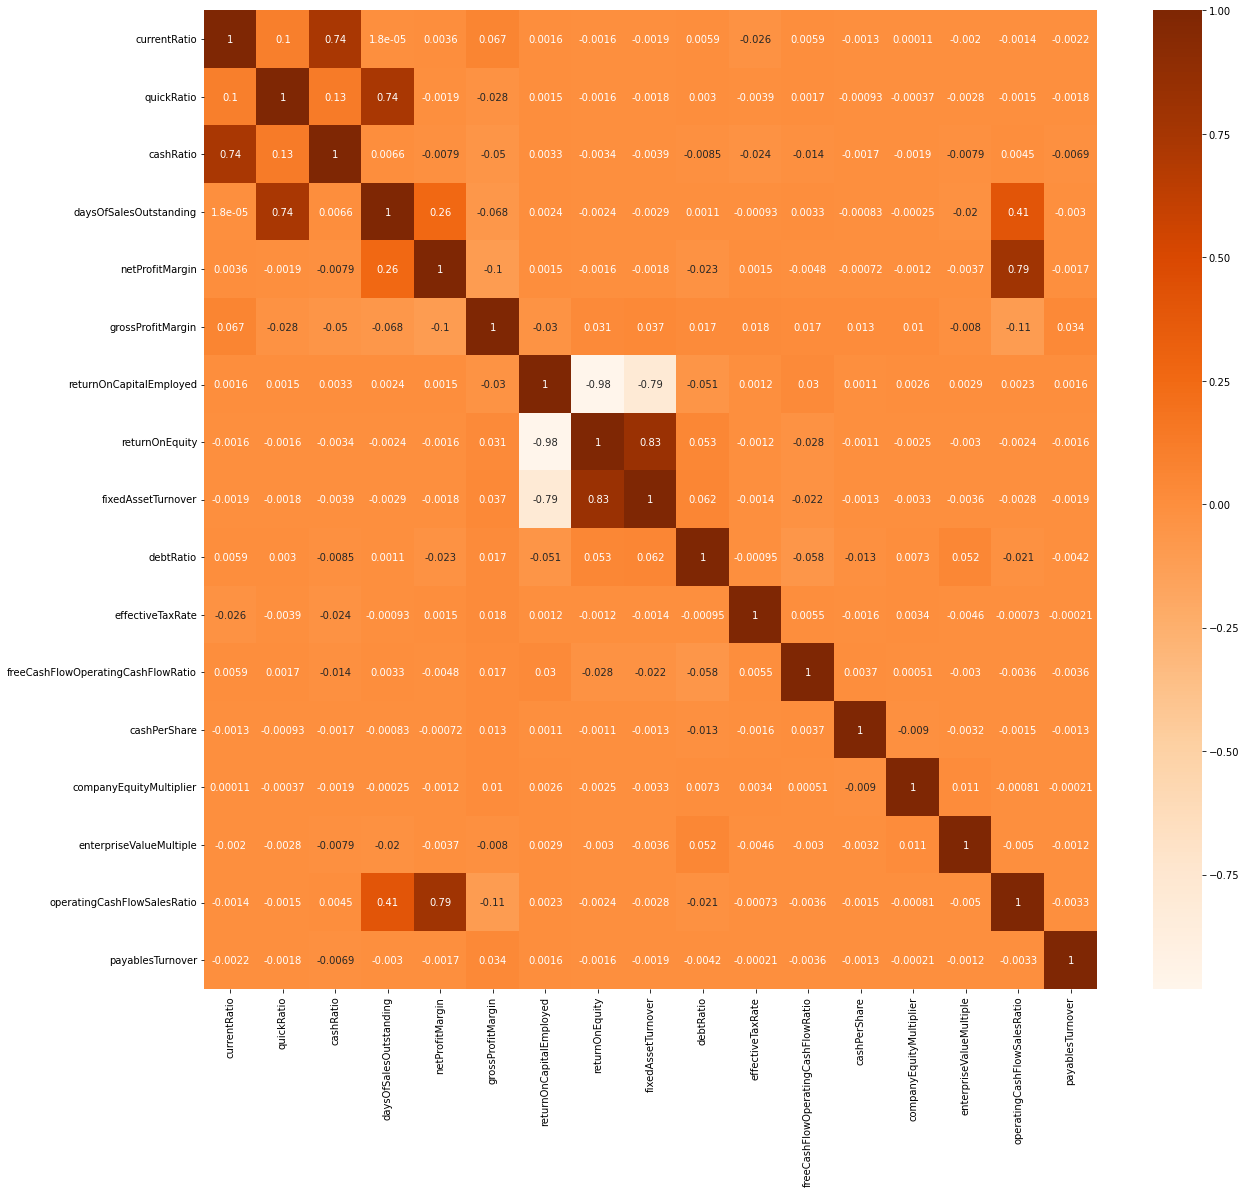

In [ ]:
#Biểu đồ tương quan giữa các feature, sau khi đã xóa các feature tương tự nhau
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), cmap='Oranges',annot=True)

In [ ]:
des=data.describe()
des

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,grossProfitMargin,returnOnCapitalEmployed,returnOnEquity,fixedAssetTurnover,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,cashPerShare,companyEquityMultiplier,enterpriseValueMultiple,operatingCashFlowSalesRatio,payablesTurnover
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2.028000e+03,2028.000000,2028.000000,2028.000000,2.028000e+03,2028.000000,2028.000000,2028.000000,2028.000000
mean,3.531059,2.655103,0.667685,333.933208,0.278496,0.497720,-74.010687,143.565300,7.273072e+03,0.661285,0.397960,0.409543,4.229633e+03,3.330842,48.301531,1.448326,38.019656
std,44.063178,32.952904,3.584798,4448.932277,6.065629,0.525318,2350.854814,4407.600705,1.890432e+05,0.208758,10.597674,3.797425,1.224301e+05,87.550842,529.249110,19.488075,759.110385
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-14.800817,-87162.162160,-63.814815,-2.679777e+01,0.000000,-100.611015,-120.916010,-1.915035e+01,-2555.419643,-3749.921337,-4.461837,-76.662850
25%,1.073057,0.602871,0.131114,22.887314,0.020981,0.233098,0.028093,0.050374,1.025051e+00,0.535488,0.147591,0.271252,1.571515e+00,2.047863,6.237490,0.073830,2.205032
50%,1.493620,0.986060,0.297573,42.373806,0.064722,0.414671,0.074519,0.122456,3.811875e+00,0.640907,0.300712,0.644685,3.687036e+00,2.654292,9.272444,0.133079,5.761235
75%,2.167483,1.453839,0.625018,59.330103,0.114805,0.847261,0.135039,0.201657,8.520165e+00,0.749762,0.370658,0.837079,8.091732e+00,3.658855,12.911302,0.240930,9.485535
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,2.702533,2.439504,141350.211000,5.156884e+06,1.927839,429.926282,34.594086,4.786803e+06,2562.871795,11153.607090,688.526591,20314.880400


IndexError: ignored

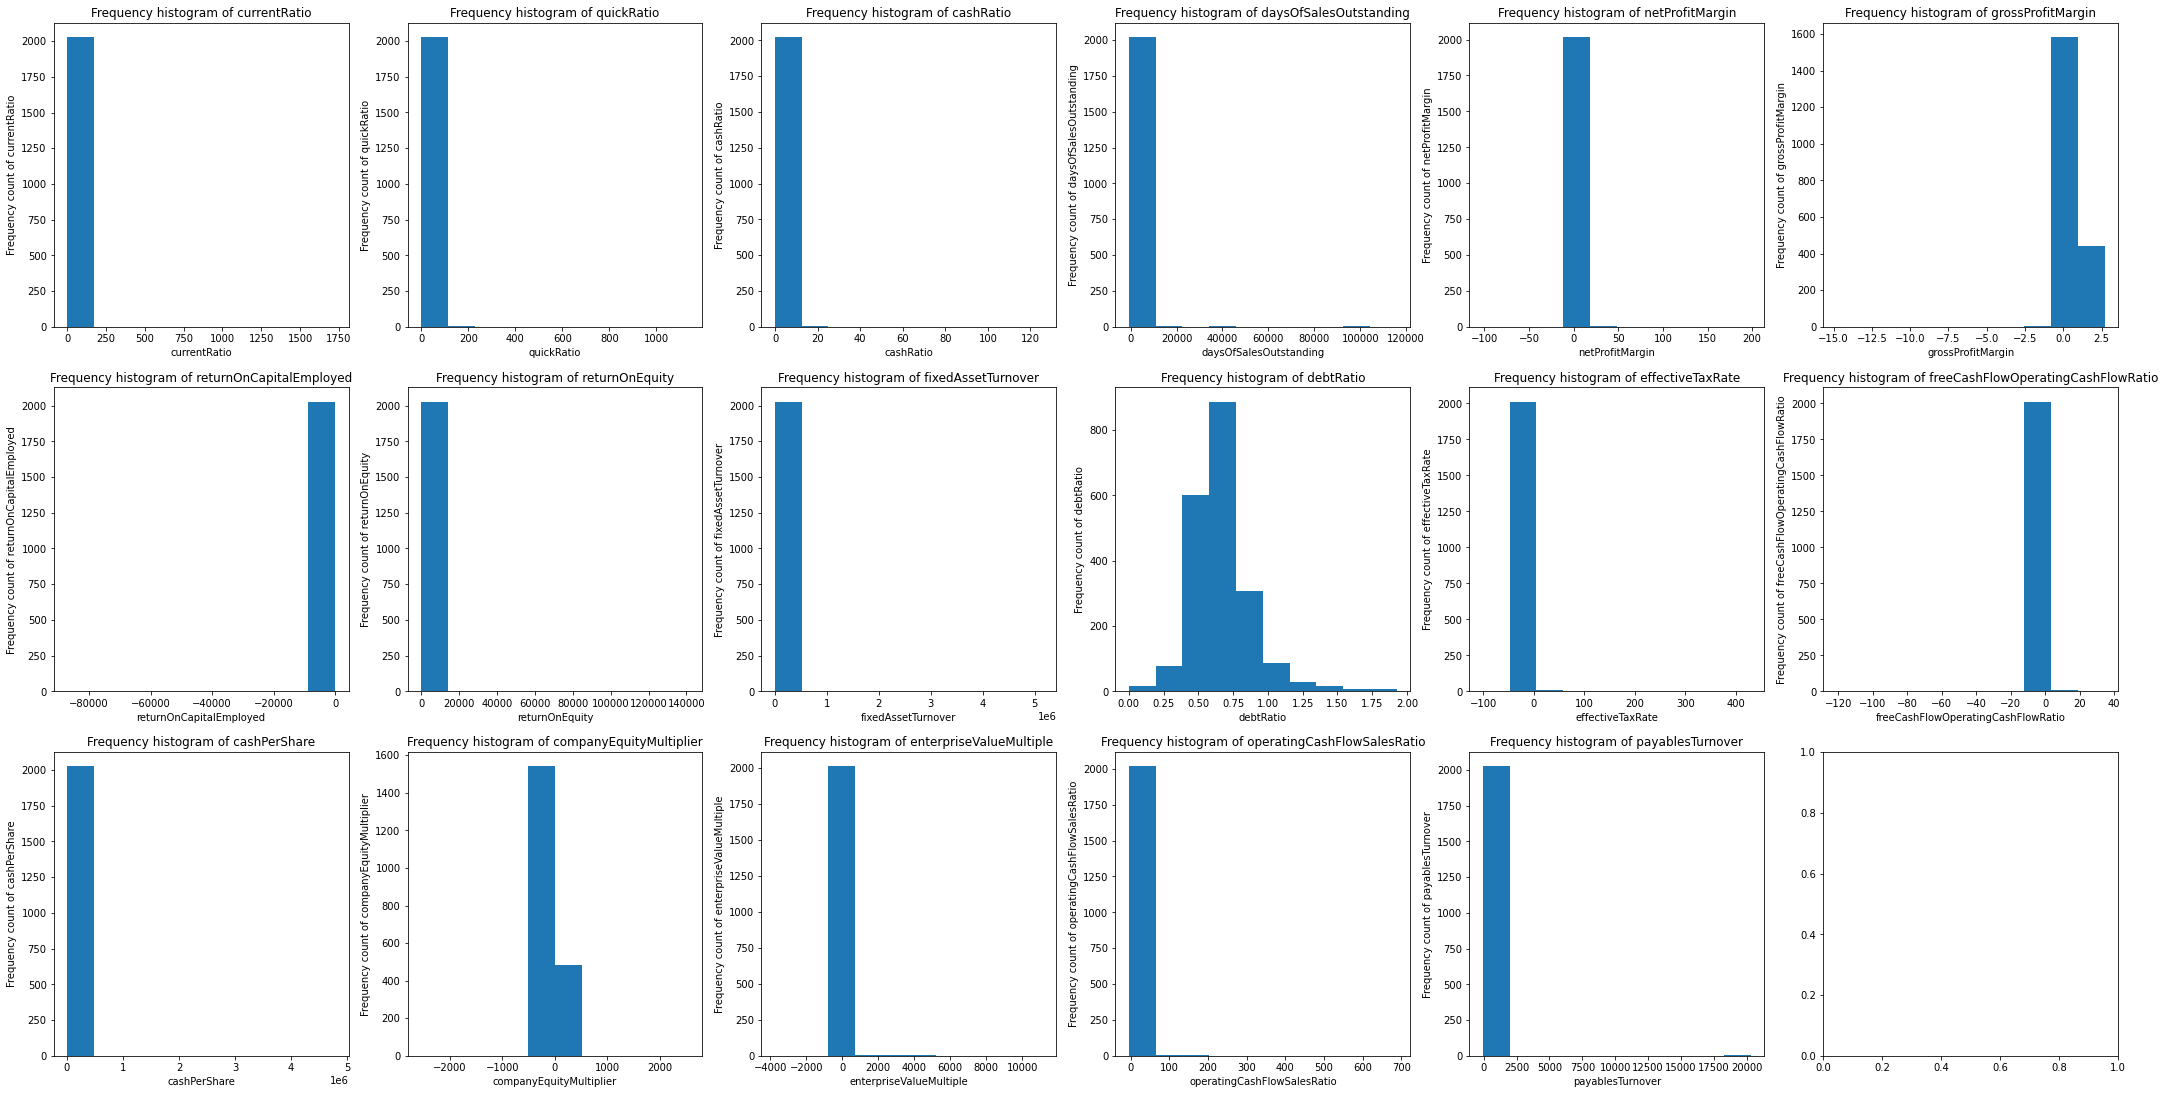

In [ ]:
#Vẽ biểu đồ phân phối
var=des.columns
var
k=0
fig,axis = plt.subplots(3,6, figsize=(37, 19))
for i in range (axis.shape[0]): #0: cột
  for j in range (axis.shape[1]): #1: dòng
    axis[i][j].hist(data[var[k]])
    axis[i][j].set_ylabel('Frequency count of ' + var[k])
    axis[i][j].set_xlabel(var[k]);
    axis[i][j].set_title('Frequency histogram of ' + var[k])
    k+=1
fig.tight_layout() #Căn chỉnh giữa các biểu đồ
plt.show()

IndexError: ignored

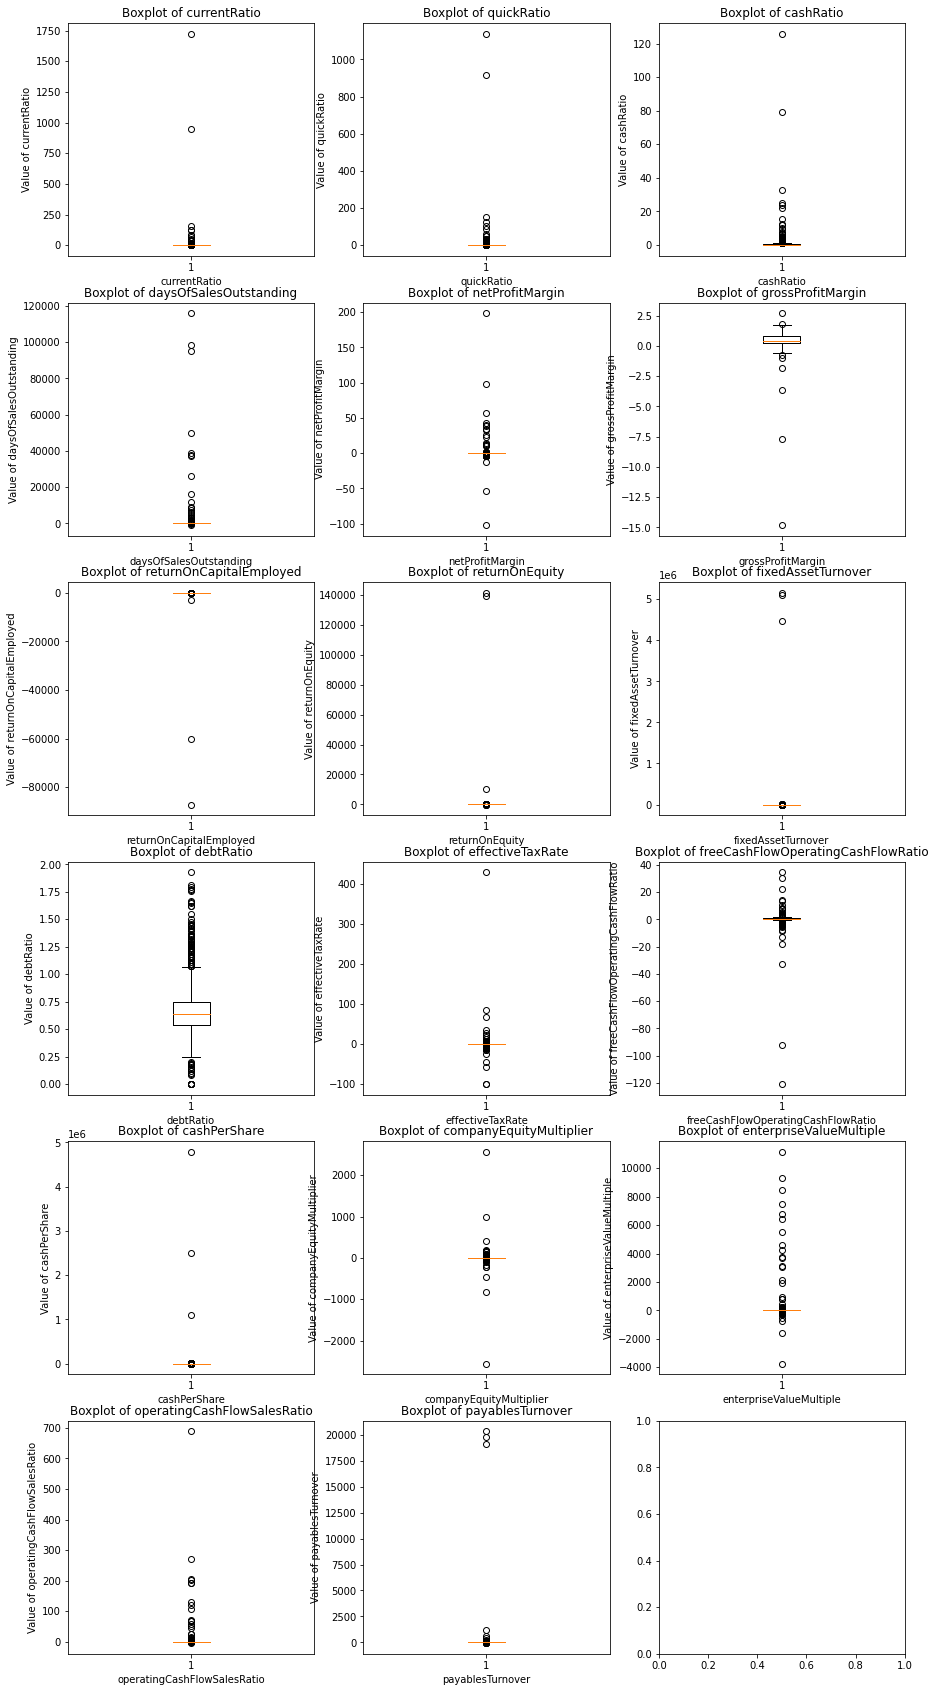

In [ ]:
#Vẽ biểu đồ hộp
k=0
fig,axis = plt.subplots(6,3, figsize=(15, 30))
for i in range (axis.shape[0]):
  for j in range (axis.shape[1]):
    axis[i][j].boxplot(data[var[k]])
    axis[i][j].set_ylabel('Value of ' + var[k])
    axis[i][j].set_xlabel(var[k])
    axis[i][j].set_title('Boxplot of ' + var[k])
    k+=1
fig.tight_layout()
plt.show()

- Dữ liệu bị ảnh hưởng bởi các ngoại lệ. Chúng ta không thể nhận xét được phân phối của dữ liệu. Nên cần Scale dữ liệu để dữ liệu trả về từ 0 đến 1.

#Machine Learning

###Feature engineering


In [ ]:
#Tạo biến giả cho cột Sector, Rating Agency Name
data=pd.get_dummies(data=data, columns=['Sector'])
data=pd.get_dummies(data=data, columns=['Rating Agency Name'])

###Split train, test

Vì dữ liệu bị bias, nên để trong tập train và test đều có đủ các label, ta sẽ tách tập dữ liệu ban đầu thành 4 tập con theo từng label, sau đó chia train - test trên từng tập con, cuối cùng gom lại còn 2 tập train - test của dữ liệu ban đầu.

In [ ]:
#Chia tập train - test theo từng label
for i in data['Rating_name']:
  if i == 'Lowest Risk':
    Lowest_Risk=data[data['Rating_name'] ==i]
    train_Lowest_Risk,test_Lowest_Risk = train_test_split(Lowest_Risk, train_size = 0.75, test_size = 0.25, random_state = 50)
  if i == 'Low Risk':
    Low_Risk=data[data['Rating_name'] ==i]
    train_Low_Risk,test_Low_Risk = train_test_split(Low_Risk, train_size = 0.75, test_size = 0.25, random_state = 50)
  if i =='Medium Risk':
    Medium_Risk=data[data['Rating_name'] ==i]
    train_Medium_Risk,test_Medium_Risk = train_test_split(Medium_Risk, train_size = 0.75, test_size = 0.25, random_state = 50)
  if i =='High Risk':
    High_Risk=data[data['Rating_name'] ==i]
    train_High_Risk,test_High_Risk = train_test_split(High_Risk, train_size = 0.75, test_size = 0.25, random_state = 50)
  else:
    Highest_Risk=data[data['Rating_name'] ==i]
    train_Highest_Risk,test_Highest_Risk = train_test_split(Highest_Risk, train_size = 0.75, test_size = 0.25, random_state = 50)

In [ ]:
#tập train - test của dữ liệu gốc
train=pd.concat([train_Lowest_Risk, train_Low_Risk, train_Medium_Risk, train_High_Risk, train_Highest_Risk])
train=train.drop(['Rating', 'Name', 'Symbol', 'Date'], axis=1)
test=pd.concat([test_Lowest_Risk, test_Low_Risk, test_Medium_Risk, test_High_Risk, test_Highest_Risk])
test=test.drop(['Rating',  'Name','Symbol', 'Date'], axis=1)

X_train=train.drop(['Rating_name'], axis=1)
Y_train=train['Rating_name']

X_test=test.drop(['Rating_name'],axis=1)
Y_test=test['Rating_name']

###Feature scaling

Vì dữ liệu không có phân phối chuẩn, nên ta normalize dữ liệu, để đưa giá trị từ miền bất kỳ về đoạn [0,1]

In [ ]:
#Normalization dữ liệu
model_scale = MinMaxScaler()
model_scale.fit(X_train)
train_scaled = model_scale.transform(X_train)
test_scaled = model_scale.transform(X_test)

##Model building


###Naive Bayes

In [ ]:
#Xây dựng mô hình, dự đoán, đánh giá
GNB_model = GaussianNB()
GNB_model.fit(X_train, Y_train)
Y_pred_GNB = GNB_model.predict(X_test)
Accuracy_GNB = metrics.accuracy_score(Y_test, Y_pred_GNB)
print("GNB Accuracy:",round(Accuracy_GNB,3))

GNB Accuracy: 0.051


###KNN

In [ ]:
#Xây dựng mô hình, dự đoán, đánh giá
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)
Y_pred_KNN = KNN_model.predict(X_test)
Accuracy_KNN = metrics.accuracy_score(Y_test, Y_pred_KNN)
print("KNN Accuracy:",round(Accuracy_KNN,3))

KNN Accuracy: 0.512


###SVM

In [ ]:
#Xây dựng mô hình, dự đoán, đánh giá
SVM_model = SVC()
SVM_model.fit(X_train, Y_train)
Y_pred_SVM = SVM_model.predict(X_test)
Accuracy_SVM = metrics.accuracy_score(Y_test, Y_pred_SVM)
print("SVM Accuracy:",round(Accuracy_SVM,3))

SVM Accuracy: 0.39


###Random Forest

In [ ]:
#Xây dựng mô hình, dự đoán, đánh giá
RF_model = RandomForestClassifier()
RF_model.fit(X_train,Y_train)
Y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(Y_test, Y_pred_RF)
print("RF Accuracy:",round(Accuracy_RF,3))

RF Accuracy: 0.701


###XGBoost

In [ ]:
# XGB_model = xgb.XGBRegressor()
# XGB_model.fit(X_train,Y_train)
# Y_pred_XGB = XGB_model.predict(X_test)
# Accuracy_XGB = metrics.accuracy_score(Y_test, Y_pred_XGB)
# print("XGB Accuracy:",round(Accuracy_XGB,3))

###Gradient Boosting Classifier

In [ ]:
#Xây dựng mô hình, dự đoán, đánh giá
GBT_model = GradientBoostingClassifier()
GBT_model.fit(X_train, Y_train)
Y_pred_GBT = GBT_model.predict(X_test)
Accuracy_GBT = metrics.accuracy_score(Y_test, Y_pred_GBT)
print("GBT Accuracy:",round(Accuracy_GBT,3))

GBT Accuracy: 0.663


###LightGBM

In [ ]:
import lightgbm as lgb
GBM_model = lgb.LGBMClassifier()
GBM_model.fit(X_train, Y_train)
Y_pred_GBM = GBM_model.predict(X_test)
Accuracy_GBM = metrics.accuracy_score(Y_test, Y_pred_GBM)
print("GBT Accuracy:",round(Accuracy_GBM,3))

GBT Accuracy: 0.691


###Compare

In [ ]:
accuracy_list = [Accuracy_GNB, Accuracy_KNN, Accuracy_SVM, Accuracy_RF, Accuracy_GBT, Accuracy_GBM]

model_list = ['Naive Bayes', 'KNN', 'SVM', 'Random Forest', 'Gradient Boosting Classifier', 'LightGBM']

accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})
accuracy

,Model,Accuracy
0,Naive Bayes,0.051181
1,KNN,0.511811
2,SVM,0.389764
3,Random Forest,0.700787
4,Gradient Boosting Classifier,0.663386
5,LightGBM,0.690945


- Random Forest là model dự đoán tốt nhất, với độ chính xác là 70%

###Confusion matrix

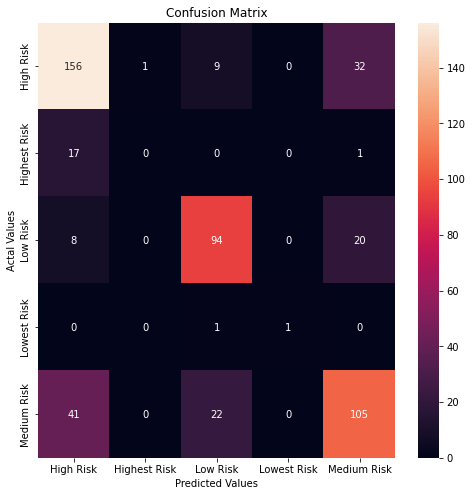

In [ ]:
# Tạo ma trận nhầm lẫn, so sánh y_test và y_pred
cm = confusion_matrix(Y_test, Y_pred_RF)
# Tạo khung dữ liệu cho ma trận Nhầm lẫn có định dạng mảng, vì vậy sẽ dễ dàng vẽ đồ thị.
cm_df = pd.DataFrame(cm, index = ['High Risk', 'Highest Risk', 'Low Risk', 'Lowest Risk', 'Medium Risk'] , columns =['High Risk', 'Highest Risk', 'Low Risk', 'Lowest Risk', 'Medium Risk'] )
# Vẽ ma trận nhầm lẫn
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

- High Risk

TP = 156

FN = 1 + 9 + 0 + 32 = 42

FP = 17 + 8 + 0 + 41 = 66

TN = 244

- Highest Risk

TP = 0

FN = 17 + 0 + 0 + 1 = 18

FP = 1 + 0 + 0 + 0 = 1

TN = 489

- Low Risk

TP = 94

FN = 8 + 0 + 0 + 20 = 28

FP = 9 + 0 + 1 + 22 = 32

TN = 354

- Lowest Risk

TP = 1

FN = 0 + 0 + 1 + 0 = 1

FP = 0

TN = 506

- Medium Risk

TP = 105

FN = 41 + 0 + 22 + 0 = 63

FP = 32 + 1 + 20 + 0 = 53

TN = 287

In [ ]:
#Chỉ số đánh giá hiệu quả mô hình Random Forest
print(classification_report(Y_test, Y_pred_RF, target_names = ['High Risk', 'Highest Risk', 'Low Risk', 'Lowest Risk', 'Medium Risk']))

              precision    recall  f1-score   support

   High Risk       0.70      0.79      0.74       198
Highest Risk       0.00      0.00      0.00        18
    Low Risk       0.75      0.77      0.76       122
 Lowest Risk       1.00      0.50      0.67         2
 Medium Risk       0.66      0.62      0.64       168

    accuracy                           0.70       508
   macro avg       0.62      0.54      0.56       508
weighted avg       0.68      0.70      0.69       508



- Rõ ràng nhận thấy do "High Risk" có nhiều dữ liệu nhất, nên khả năng dự đoán của mô hình cho nhãn này khá tốt, và cao nhất so với cái label khác, với F1-Score = 0.74. 

- Label "Lowest Risk" ít dữ liệu nhất, nhưng mô hình dự đoán khá tốt, với F1 - Score = 0.67.
- Nhìn chung, hầu hết các nhãn, mô hình đều đã đạt được điểm phân loại tốt, ngoại trừ nhãn "Highest Risk".